# 用梯度下降法做单变量线性回归

Data: feature--Population  Response--GDP

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### 数据预处理

In [4]:
#input data 
data = pd.read_table("data.txt", header=None, sep=",", names=["Population","GDP"])
data.head()

,Population,GDP
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
#查看数据
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   GDP         97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


,Population,GDP
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<AxesSubplot:title={'center':'Plot of Population vs GDP'}, xlabel='Population', ylabel='GDP'>

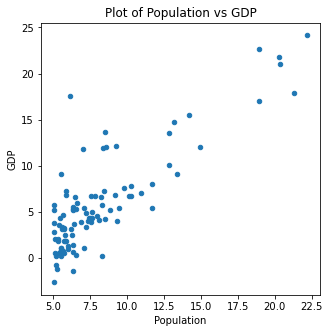

In [6]:
#通过图像来查看自变量和因变量的线性关系
data.plot(kind="scatter", x="Population", y="GDP", figsize=(5,5),title="Plot of Population vs GDP")

Choose hypothesis:  h(x)=theta0+theta1*X

### 初始化变量

In [7]:
#在data.frame前插入一列1
data.insert(0,"X0",1)

In [8]:
#set X, y and theta
cols = data.shape[1] #列数
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.matrix([0,0])

In [9]:
# transform X and y into matrix
X = np.matrix(X.values)
y = np.matrix(y.values)

In [10]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

### 计算Cost function

In [10]:
def computeCost(X,y,theta):
    inner = np.power(((X * theta.T) - y), 2)
    Cost = np.sum(inner)/(2*len(X))
    return Cost

In [11]:
computeCost(X,y,theta)

32.072733877455676

### Gradient descent

In [12]:
def gradientDescent(X,y,theta,alpha,iteration):
    temp = np.matrix(np.zeros(theta.shape)) # 初始化一个临时向量，用来存theta的值
    cost = list() #创建一个空列表
    m = X.shape[0] #sample size
    for i in range(iteration):
        temp = theta - (alpha/m)*(X * theta.T - y).T * X
        theta = temp
        cost.append(computeCost(X,y,theta))
    return theta, cost

In [13]:
#初始化学习速率和迭代次数
alpha = 0.01
iteration = 2000

In [14]:
#应用函数
[final_theta,cost] = gradientDescent(X,y,theta,alpha,iteration)

In [15]:
final_theta #parameter estimator 

matrix([[-3.78806857,  1.18221277]])

### Draw plot to select iteration times 

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Cost')

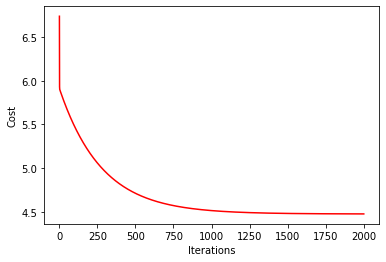

In [16]:
plt.plot(list(range(1,iteration+1)),cost,"r")
plt.xlabel("Iterations")
plt.ylabel("Cost")

So maybe 1000 is a good choice for iteration